# Preprocessing Data 

<img src="https://i.imgur.com/NpXeOWo.png" width=500 align="center">

# Read this first 

To run the code, you have to upload ```all_amazon_reviews.csv``` first. (upload in the folder icon at the left) 

Download them from the GDrive folder. 

### Import data and preview

In [57]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [58]:
reviews_df = pd.read_csv('all_amazon_reviews.csv')

# Cleaning other columns

In [59]:
string_to_number_rating = {'1.0 out of 5 stars' : 1,
                           '2.0 out of 5 stars' : 2,
                           '3.0 out of 5 stars' : 3,
                           '4.0 out of 5 stars' : 4,
                           '5.0 out of 5 stars' : 5}
# Convert to int for rating
reviews_df['rating'] = reviews_df['rating'].map(string_to_number_rating)
reviews_df['rating'].fillna(0, inplace=True)
reviews_df['rating'] = reviews_df['rating'].apply(lambda x: round(x))

comment_df = reviews_df[['content','rating']]

# Isolate Content Variable as dataframe

### Drop rating == 3 

In [60]:
comment_df = comment_df[comment_df.rating != 3]
comment_df['rating'].unique()

array([4, 5, 1, 2], dtype=int64)

In [61]:
# Convert the rating to sentiment 1 or 0
def positve_negative(x):
    if(x == 4): 
      return 1
    elif(x == 5):
      return 1
    else:
      return 0

In [62]:
comment_df['sentiment'] = comment_df['rating'].apply(positve_negative)
comment_df.head()

,content,rating,sentiment
0,"I gave this book four stars because I did legitimately enjoy reading it, and I would recommend it to other Harry Potter fans (and maybe some non-fans!) to read as well. I won't compare this to the original series, because that'd be like trying to compare anything with perfection in my world. There were some things that did bother me about this book though, which I'll get to in a bit.\n\nI'll start with what I liked:\nIt has been nine years since the last Harry Potter book came out, in which I stood in line dressed as Luna Lovegood nervously avoiding everything in fear of spoilers, and as a die-hard fan I loved the excuse to return to a world I almost feel that I grew up in. I liked reading this play because I've always been eager for more Harry, and this gave me more Harry.\nI actually thought it worked well as a play, too. Plays/scripts will by virtue of their format not be able to offer as much detail and description as a book might, especially when reading a script vs seeing it as it was meant to be seen. But GIVEN that it's a play and that has to be expected, I appreciated the description that was included. There was enough in there for me to smile along with a new favorite character (Scorpius) and I definitely cried at the end, but I cry at a lot of things, so take that with a grain of salt.\n\nAnd the things I DIDN'T like are more because of that die-hard HP fan thing, but I'll give an overview anyway:\nSome of the plot points in this book just don't WORK, given the story's previous canon. I won't go into too much detail, because spoilers, but trolley witches? A certain office that seemed far too easy to get into? A kind of major relationship that seems much too far-fetched to ever be considered reality in this universe? I don't know. I just kept pausing while reading this and thinking, but, wait, THAT'S a bit contradictory.\n\nI don't know if I'll return to re-read this many times, but I have no regrets about my midnight trek to buy it among my fellow book-lovers, and I will probably still see the play if given the chance.",4,1
1,"I don't understand these 1-2 star ratings, I really don't. I thoroughly enjoyed this script book. It might not have been on par with the original Harry Potter series, but it was good in its own right. The pacing was smooth for me, even if it moved a little fast in the beginning. But this isn't a novel, it's supposed to be made into a play. Which is why I understand the pacing and not going into huge details about each year.\n\n[spoiler]Being a Slytherin myself, I love that Albus was sorted into the greatest house and made quick friends with Scorpius. He struggled with the placement, but came to realize it was were he belonged in the end.[/spoiler]\n\nI was hooked on this from the first page and finished it within the second day of owning it. I grew up with Harry Potter, but I wasn't overly excited for this script book since it isn't an actual novel. But it was a pleasant read and I'd recommend it to any fan of the series. Definitely a great insight into what our favorite characters have been up to since leaving Hogwarts. I would love to see this play!",4,1
2,"I think I would have enjoyed this more as a novel, but I did enjoy the story. I thought some of the stage directions would be difficult to produce, perhaps better suited to a movie. Also, I thought the characters were a little one dimensional, but a good actor could probably round them out.",4,1
3,"If you liked the harry potter series, you will love this book. It brings back all the feelings from the original series. However, this book will not bring new fans to the table. Its a short read and worth the money",4,1
4,"It wasn't as good as Rowling's novels, and there were a couple of points that were odd, but if you're willing to move beyond that I thought it was an excellent play. As you're reading it keep a performance in your mind and you should enjoy it a good bit.",4,1


The below converts each comment to 
1. Only alphanumeric characters
2. Entirely lowercase
3. Without trailing or leading spaces
4. No empty strings 

In [63]:
import re

def general_cleaning(x):
    x = str(x)
    pattern = '[^a-zA-Z0-9\ ]'
    x = re.sub(pattern,'',x)
    x = x.lower()
    x = x.strip()
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    x = re.sub(r'(.)\1+', r'\1\1', x)
    # Remove - & '
    x = re.sub(r'(-|\')', ' ', x)
    return x

Replace - with space <br>
Replace ... with space <br>
depressing, depressed, -> negative <br> 
boooooringggg	-> boring <br> 
replace ... with space <br> 
replace ...... with space <br> 
replace . with space <br> 
replace xmass with christmas <br>
replace 
replace tewwible with terrible <br> 
replace 'll with will <br> 
replace frekking with freaking <br> 
remove links that start with https <br> 

In [64]:
def custom_preprocessing(x):
    x = re.sub('(https?://[\S]+)', ' URL ', str(x))
    x = x.replace("xmass", "christmas")
    x = x.replace("...", " ")
    x = x.replace("'ll", "will")
    x = x.replace("tewwible", "terrible") 
    x = x.replace("frekking", "freaking")
    return x

In [65]:
comment_df = comment_df[comment_df['content'] != '']
comment_df['content'] = comment_df['content'].apply(custom_preprocessing).apply(general_cleaning)
comment_df.head()

,content,rating,sentiment
0,i gave this book four stars because i did legitimately enjoy reading it and i would recommend it to other harry potter fans and maybe some nonfans to read as well i wont compare this to the original series because thatd be like trying to compare anything with perfection in my world there were some things that did bother me about this book though which iwill get to in a bitiwill start with what i likedit has been nine years since the last harry potter book came out in which i stood in line dressed as luna lovegood nervously avoiding everything in fear of spoilers and as a diehard fan i loved the excuse to return to a world i almost feel that i grew up in i liked reading this play because ive always been eager for more harry and this gave me more harryi actually thought it worked well as a play too playsscripts will by virtue of their format not be able to offer as much detail and description as a book might especially when reading a script vs seeing it as it was meant to be seen but given that its a play and that has to be expected i appreciated the description that was included there was enough in there for me to smile along with a new favorite character scorpius and i definitely cried at the end but i cry at a lot of things so take that with a grain of saltand the things i didnt like are more because of that diehard hp fan thing but iwill give an overview anywaysome of the plot points in this book just dont work given the storys previous canon i wont go into too much detail because spoilers but trolley witches a certain office that seemed far too easy to get into a kind of major relationship that seems much too farfetched to ever be considered reality in this universe i dont know i just kept pausing while reading this and thinking but wait thats a bit contradictoryi dont know if iwill return to reread this many times but i have no regrets about my midnight trek to buy it among my fellow booklovers and i will probably still see the play if given the chance,4,1
1,i dont understand these 12 star ratings i really dont i thoroughly enjoyed this script book it might not have been on par with the original harry potter series but it was good in its own right the pacing was smooth for me even if it moved a little fast in the beginning but this isnt a novel its supposed to be made into a play which is why i understand the pacing and not going into huge details about each yearspoilerbeing a slytherin myself i love that albus was sorted into the greatest house and made quick friends with scorpius he struggled with the placement but came to realize it was were he belonged in the endspoileri was hooked on this from the first page and finished it within the second day of owning it i grew up with harry potter but i wasnt overly excited for this script book since it isnt an actual novel but it was a pleasant read and id recommend it to any fan of the series definitely a great insight into what our favorite characters have been up to since leaving hogwarts i would love to see this play,4,1
2,i think i would have enjoyed this more as a novel but i did enjoy the story i thought some of the stage directions would be difficult to produce perhaps better suited to a movie also i thought the characters were a little one dimensional but a good actor could probably round them out,4,1
3,if you liked the harry potter series you will love this book it brings back all the feelings from the original series however this book will not bring new fans to the table its a short read and worth the money,4,1
4,it wasnt as good as rowlings novels and there were a couple of points that were odd but if youre willing to move beyond that i thought it was an excellent play as youre reading it keep a performance in your mind and you should enjoy it a good bit,4,1


In [66]:
comment_df['content'] = comment_df['content'].fillna('').apply(str)
comment_df.head()

,content,rating,sentiment
0,i gave this book four stars because i did legitimately enjoy reading it and i would recommend it to other harry potter fans and maybe some nonfans to read as well i wont compare this to the original series because thatd be like trying to compare anything with perfection in my world there were some things that did bother me about this book though which iwill get to in a bitiwill start with what i likedit has been nine years since the last harry potter book came out in which i stood in line dressed as luna lovegood nervously avoiding everything in fear of spoilers and as a diehard fan i loved the excuse to return to a world i almost feel that i grew up in i liked reading this play because ive always been eager for more harry and this gave me more harryi actually thought it worked well as a play too playsscripts will by virtue of their format not be able to offer as much detail and description as a book might especially when reading a script vs seeing it as it was meant to be seen but given that its a play and that has to be expected i appreciated the description that was included there was enough in there for me to smile along with a new favorite character scorpius and i definitely cried at the end but i cry at a lot of things so take that with a grain of saltand the things i didnt like are more because of that diehard hp fan thing but iwill give an overview anywaysome of the plot points in this book just dont work given the storys previous canon i wont go into too much detail because spoilers but trolley witches a certain office that seemed far too easy to get into a kind of major relationship that seems much too farfetched to ever be considered reality in this universe i dont know i just kept pausing while reading this and thinking but wait thats a bit contradictoryi dont know if iwill return to reread this many times but i have no regrets about my midnight trek to buy it among my fellow booklovers and i will probably still see the play if given the chance,4,1
1,i dont understand these 12 star ratings i really dont i thoroughly enjoyed this script book it might not have been on par with the original harry potter series but it was good in its own right the pacing was smooth for me even if it moved a little fast in the beginning but this isnt a novel its supposed to be made into a play which is why i understand the pacing and not going into huge details about each yearspoilerbeing a slytherin myself i love that albus was sorted into the greatest house and made quick friends with scorpius he struggled with the placement but came to realize it was were he belonged in the endspoileri was hooked on this from the first page and finished it within the second day of owning it i grew up with harry potter but i wasnt overly excited for this script book since it isnt an actual novel but it was a pleasant read and id recommend it to any fan of the series definitely a great insight into what our favorite characters have been up to since leaving hogwarts i would love to see this play,4,1
2,i think i would have enjoyed this more as a novel but i did enjoy the story i thought some of the stage directions would be difficult to produce perhaps better suited to a movie also i thought the characters were a little one dimensional but a good actor could probably round them out,4,1
3,if you liked the harry potter series you will love this book it brings back all the feelings from the original series however this book will not bring new fans to the table its a short read and worth the money,4,1
4,it wasnt as good as rowlings novels and there were a couple of points that were odd but if youre willing to move beyond that i thought it was an excellent play as youre reading it keep a performance in your mind and you should enjoy it a good bit,4,1


In [67]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\delim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\delim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\delim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
# Stemming
def word_pre(x):
    stemmer = PorterStemmer()
    x = word_tokenize(x)
    store = ''
    
    for i in x:
        store += stemmer.stem(i) + ' '
        
    return store

# Stopwords 
stop = stopwords.words('english')
additional_stopwords = ["'s","...","'ve","``","''","'m",'--',"'ll","'d"]
stop = set(stop + additional_stopwords)
def remove_stop(x):
    x = word_tokenize(x)
    store = ''
    
    for i in x:
        if i not in stop:
            store += i + ' '
            
    return store

In [69]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def lemmatize_it(text):
  store = ''
  tokens = word_tokenize(text)
  lemma_function = WordNetLemmatizer()
  for token, tag in pos_tag(tokens):
    store += lemma_function.lemmatize(token, tag_map[tag[0]]) + ' '
  return str(store)

In [70]:
comment_df['content_stem'] = comment_df['content'].apply(word_pre)
comment_df['content_stem_cleaned'] = comment_df['content_stem'].apply(remove_stop)
comment_df['content_cleaned'] = comment_df['content'].apply(remove_stop)
comment_df['content_lem'] = comment_df['content'].apply(lemmatize_it)
comment_df['content_lem_cleaned'] = comment_df['content_lem'].apply(remove_stop)
comment_df.head()

,content,rating,sentiment,content_stem,content_stem_cleaned,content_cleaned,content_lem,content_lem_cleaned
0,i gave this book four stars because i did legitimately enjoy reading it and i would recommend it to other harry potter fans and maybe some nonfans to read as well i wont compare this to the original series because thatd be like trying to compare anything with perfection in my world there were some things that did bother me about this book though which iwill get to in a bitiwill start with what i likedit has been nine years since the last harry potter book came out in which i stood in line dressed as luna lovegood nervously avoiding everything in fear of spoilers and as a diehard fan i loved the excuse to return to a world i almost feel that i grew up in i liked reading this play because ive always been eager for more harry and this gave me more harryi actually thought it worked well as a play too playsscripts will by virtue of their format not be able to offer as much detail and description as a book might especially when reading a script vs seeing it as it was meant to be seen but given that its a play and that has to be expected i appreciated the description that was included there was enough in there for me to smile along with a new favorite character scorpius and i definitely cried at the end but i cry at a lot of things so take that with a grain of saltand the things i didnt like are more because of that diehard hp fan thing but iwill give an overview anywaysome of the plot points in this book just dont work given the storys previous canon i wont go into too much detail because spoilers but trolley witches a certain office that seemed far too easy to get into a kind of major relationship that seems much too farfetched to ever be considered reality in this universe i dont know i just kept pausing while reading this and thinking but wait thats a bit contradictoryi dont know if iwill return to reread this many times but i have no regrets about my midnight trek to buy it among my fellow booklovers and i will probably still see the play if given the chance,4,1,i gave thi book four star becaus i did legitim enjoy read it and i would recommend it to other harri potter fan and mayb some nonfan to read as well i wont compar thi to the origin seri becaus thatd be like tri to compar anyth with perfect in my world there were some thing that did bother me about thi book though which iwil get to in a bitiwil start with what i likedit ha been nine year sinc the last harri potter book came out in which i stood in line dress as luna lovegood nervous avoid everyth in fear of spoiler and as a diehard fan i love the excus to return to a world i almost feel that i grew up in i like read thi play becaus ive alway been eager for more harri and thi gave me more harryi actual thought it work well as a play too playsscript will by virtu of their format not be abl to offer as much detail and descript as a book might especi when read a script vs see it as it wa meant to be seen but given that it a play and that ha to be expect i appreci the descript that wa includ there wa enough in there for me to smile along with a new favorit charact scorpiu and i definit cri at the end but i cri at a lot of thing so take that with a grain of saltand the thing i didnt like are more becaus of that diehard hp fan thing but iwil give an overview anywaysom of the plot point in thi book just dont work given the stori previou canon i wont go into too much detail becaus spoiler but trolley witch a certain offic that seem far too easi to get into a kind of major relationship that seem much too farfetch to ever be consid realiti in thi univers i dont know i just kept paus while read thi and think but wait that a bit contradictoryi dont know if iwil return to reread thi mani time but i have no regret about my midnight trek to buy it among my fellow booklov and i will probabl still see the play if given the chanc,gave thi book four star becaus legitim enjoy read wou

<img src="https://i.imgur.com/caAY2Wa.png" width=500 align="center">

In [75]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_lem_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_lem']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_stem_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_stem']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

x_train, x_test, y_train, y_test = train_test_split(comment_df[['content']], 
                                                    comment_df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
comment_matrix = vectorizer.fit_transform(x_train['content'])

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
# comment_matrix = vectorizer.fit_transform(x_train['content'])

from sklearn.naive_bayes import MultinomialNB
comment_classifier = MultinomialNB().fit(comment_matrix, y_train)

from sklearn import metrics
test_vector = vectorizer.transform(x_test['content'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

confuse

array([[ 514,  126],
       [  47, 1018]], dtype=int64)

In [76]:
# count vectorizing with unigram + bigram
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

F1 score: 0.922
Precision score: 0.890
Recall score: 0.956
Average precision-recall score: 0.878


In [77]:
from sklearn.model_selection import cross_val_score
import time

for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(comment_classifier, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.8655744807359526
precision
0.9051438852730891
recall
0.8309859154929577


# SVM

In [86]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_lem_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_lem']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_stem_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_stem']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

x_train, x_test, y_train, y_test = train_test_split(comment_df[['content']], 
                                                    comment_df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,4))
comment_matrix = vectorizer.fit_transform(x_train['content'])

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
# # vectorizer = TfidfVectorizer(max_features=40000,
# #                              min_df=5, 
# #                              max_df=0.5, 
# #                              analyzer='char', 
# #                              ngram_range=(1, 6))
# comment_matrix = vectorizer.fit_transform(x_train['content_lem'])

In [87]:
from sklearn import svm
from sklearn import metrics

SVM = svm.SVC(C=1, kernel='poly', gamma=0.1, degree=1).fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['content'])
result = SVM.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[526, 114],
       [ 74, 991]], dtype=int64)

In [88]:
# count vectorizing with unigram + bigram + kernel = poly
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

F1 score: 0.913
Precision score: 0.897
Recall score: 0.931
Average precision-recall score: 0.878


In [89]:
from sklearn.model_selection import cross_val_score
import time

for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(SVM, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.8673791576289167
precision
0.8429501689161907
recall
0.8938967136150234


<table>
  <tr>
    <th>Vectorizer</th>
    <th>Preprocessing</th>
    <th>F1 Score</th>
    <th>Precision</th>
    <th>Recall </th>
    <th>Average precision-recall score</th>
    <th>% change in F1 score from base vectorizer</th>
  </tr>
  <tr>
    <td>Count</td>
    <td>None</td>
    <td>0.915</td>
    <td>0.880</td>
    <td>0.953</td>
    <td>0.867</td>
    <td>Base</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Stemming </td>
    <td>0.908</td>
    <td>0.871</td>
    <td>0.949</td>
    <td>0.858</td>
    <td>-0.7</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Lemmatization</td>
    <td>0.910</td>
    <td>0.872</td>
    <td>0.952</td>
    <td>0.860</td>
    <td>-0.5</td>
  </tr>
  <tr>
    <td>Count </td>
    <td>Stopwords </td>
    <td>0.912</td>
    <td>0.873</td>
    <td>0.953</td>
    <td>0.861</td>
    <td>-0.3</td>
  </tr>
  <tr>
    <td>Count </td>
    <td>Stemming + Stopwords</td>
    <td>0.902</td>
    <td>0.863</td>
    <td>0.945</td>
    <td>0.850</td>
    <td>-1.3</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Bigram</td>
    <td>0.912</td>
    <td>0.872</td>
    <td>0.957</td>
    <td>0.861</td>
    <td>-0.3</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Unigram + Bigram</td>
    <td>0.920</td>
    <td>0.890</td>
    <td>0.953</td>
    <td>0.877</td>
    <td>+0.5</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Unigram + Bigram + Trigram</td>
    <td>0.918</td>
    <td>0.888</td>
    <td>0.950</td>
    <td>0.875</td>
    <td>+0.3</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Bigram + Trigram</td>
    <td>0.915</td>
    <td>0.874</td>
    <td>0.960</td>
    <td>0.864</td>
    <td>0</td>
  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>None</td>
    <td>0.859</td>
    <td>0.759</td>
    <td>0.990</td>
    <td>0.757</td>
    <td>Base</td>
  </tr>
  <tr>
    <td>TF-IDF </td>
    <td>Lemmatization</td>
    <td>0.858</td>
    <td>0.758</td>
    <td>0.990</td>
    <td>0.756</td>
    <td>-0.1</td>
  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>Unigram + Bigram</td>
    <td>0.839</td>
    <td>0.726</td>
    <td>0.995</td>
    <td>0.725</td>
    <td>-2</td>
  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>Lemmatization + Stopwords</td>
    <td>0.877</td>
    <td>0.791</td>
    <td>0.986</td>
    <td>0.788</td>
    <td>+1.8</td>
  </tr>
  <tr>
    <td>TF-IDF </td>
    <td>Lemmatization + Stopwords +<br>sublinear tf scaling </td>
    <td>0.880</td>
    <td>0.794</td>
    <td>0.986</td>
    <td>0.792</td>
    <td>+2.1</td>
  </tr>
</table>

# Error Analysis

In [38]:
enhanced_df = pd.concat([x_test,y_test], axis=1)
enhanced_df['predicted'] = result
enhanced_df.head()

,content,sentiment,predicted
3553,dont go in hoping for a reading experience like a novel might give you this is not a continuation of the series nor is written completely by rowlingthis is different,1,0
6875,i do not like the way it is written not as a book but as a play hard to read very disappointed,0,0
574,i went into this book expecting not to like it too well because of the reviews but as a harry potter fan i knew that i would have to read it eventually the play format was hard to get used to at first but after a while i started to get into the groove of it however the story line started off slow and was kind of depressing the main focus is on albus potter who seems to be the complete opposite of his father and resents living in his shadow he seemed to be very lonely and depressed in his life and the only positive thing is his best friend scorpius malfoy about 14 way through the book starts to get better when the boys decide to help out amos diggory who wants to use a time turner to bring back his son albus and scorpius make several attempts traveling back in time trying to change the past but all their attempts create terrible butterfly effects on the present i did enjoy reading about snape very briefly in one of the alternate realities traveled to since snape is my favorite character but like other people have pointed out all the time travel stuff does kind of read like fanfiction the book was ok but i was sad that the main characters of the harry potter series just seemed to have just gotten old and boring,1,1
3408,loved the book wish that th here was more harry potter to come like many others i cant get enough of these stories,1,1
8480,im a huge harry potter fan and was so excited when i heard there will be a new book i preordered it and was full of excitement when it was delivered all of that excitement left once i opened the book i read the first two pages and couldnt get passed the format from what i hear from people that were able to get passed the format its a terrible story huge disappointment my dog came into my room and peed on it and i couldnt even be upset,0,0


In [40]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', -1)
wrong_df = enhanced_df[enhanced_df['sentiment'] != enhanced_df['predicted']]
wrong_df['length'] = wrong_df['content'].str.len()
wrong_df = wrong_df.sort_values(by=['sentiment','length'], ascending=[False, True])
wrong_df

C:\Users\delim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,content,sentiment,predicted,length
2983,no nudity disappointing,1,0,23
4216,please keep writing we are waiting,1,0,34
1833,didnt think i would like this but i did,1,0,39
2972,best harry potter fanfiction ive ever read,1,0,42
4581,a disappointing potter episode after the incredible 7,1,0,53
938,i only received the part one i may never know the rest,1,0,55
4750,it was good not great not much of a story not like the books,1,0,62
3939,book was very good however i didnt like the format of the story,1,0,63
3519,a collaboration so it really doesnt feel like jk rowlings work not bad though,1,0,78
3484,i found harry to just not be what he was but the plot was really fast jumping all over,1,0,86


In [23]:
wrong_df.to_csv('wrongly_classified.csv', index=False)

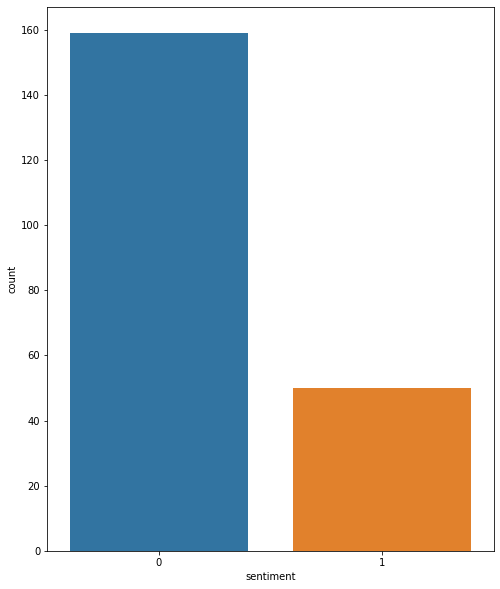

In [24]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x="sentiment", data=wrong_df);

# EDA

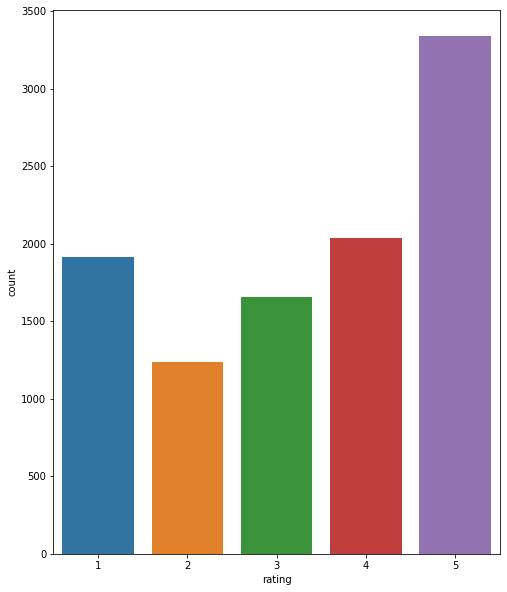

In [25]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x="rating", data=reviews_df);

In the ```Merging CSV.ipynb``` file, I saw that there were a number of duplicated authors and wanted to find out why

List/No. of duplicated authors 

In [26]:
duplicated_rows = reviews_df[reviews_df['author'].duplicated()]
# duplicated_rows.author.unique()
len(duplicated_rows.author.unique())
# There are 355 unique duplicates

355

In the below table, we observe that there are authors that do not have a registered name and are using the name 'Amazon Customer' and 'Kindle Customer'.

In [27]:
top_10_df = reviews_df.groupby('author').size().reset_index(name='No. of Repeats')
top_10_df.sort_values('No. of Repeats', ascending=False).head(10)                                                          

,author,No. of Repeats
277,Amazon Customer,1062
3723,Kindle Customer,269
5843,Sarah,14
5370,Rachel,14
255,Amanda,13
185,Alex,12
518,Ashley,12
3093,Jessica,12
321,Amy,11
3580,Katie,11


List/No. of duplicated titles

In [28]:
duplicated_rows = reviews_df[reviews_df['title'].duplicated()]
# duplicated_rows.title.unique()
len(duplicated_rows.title.unique())
# There are 353 unique duplicates 

353

In the below table, we observe that there are titles that just label the rating of the review as their title

In [29]:
top_10_df = reviews_df.groupby('title').size().reset_index(name='No. of Repeats')
top_10_df.sort_values('No. of Repeats', ascending=False).head(10)                                                          

,title,No. of Repeats
1719,Five Stars,933
1760,Four Stars,308
4818,One Star,283
5906,Three Stars,257
5973,Two Stars,152
1255,Disappointing,67
1233,Disappointed,59
4143,Meh,30
2064,Great,29
4048,Loved it!,28
